# NUMPY: Read CSV file with curve data, integrate, differentiate

1. Read the file `spec.csv`. It contains some listed function values (aka 'curve'). 
1. Name the first column `x` and the second `y`.
1. Use the trapezoid rule to integrate the curve. Use the function `ìntegrate2()`  
1. Differentiate the curve.
1. Find all local maxima of the listed curve.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Trapezoid rule for listed function values

def integrate_listed_values(x,y):
    
    xL = x[:-1]
    yL = y[:-1]
    
    xR = x[1:]
    yR = y[1:]
    
    Dx = xR - xL
    
    My = 1/2*(yR + yL)
    
    Ak = Dx*My
    
    I = np.sum(Ak)
    
    C     = x*0 # a vector of len(x) initialized with zeros.    
    C[0]  = 0
    C[1:] = np.cumsum(Ak) 

    return I, C


In [6]:
# Secant rule for listed function vlues

def differentiate_listed_values(x,y):
    # All left points of the triangles
    xL = x[0:-2]
    yL = y[0:-2]

    # All right points of the triangle
    xR = x[2:]
    yR = y[2:]

    # Delta x and Delta y for the triangles
    Dx = xR - xL
    Dy = yR - yL

    # The slope of the triangles, which have to be assigned to index k = 1 ... N-1
    m = Dy / Dx

    # To shift the indices create a vector of length N+1 (as long as the measurement series) initialized with 0 
    M = np.zeros(x.shape)

    # center m in M, i.e. leave one vector element free at each side. The slopes a the sides are initialized with M[0] = 0, M[N] = 0 
    M[1:-1] = m 

    # Fill in the slopes at the boundaries
    M[0]  = ( y[1] - y[0] ) / ( x[1] - x[0] )
    M[-1] = ( y[-1]- y[-2]) / ( x[-1]- x[-2])
    
    return M

In [71]:
# Read the csv file with numpy.
X = np.genfromtxt("spec.csv", delimiter = ";")

In [73]:
X.shape

(101, 2)

In [113]:
# Save the columns in the variables `x` and `y`.
x,y = X[:,0], X[:,1]

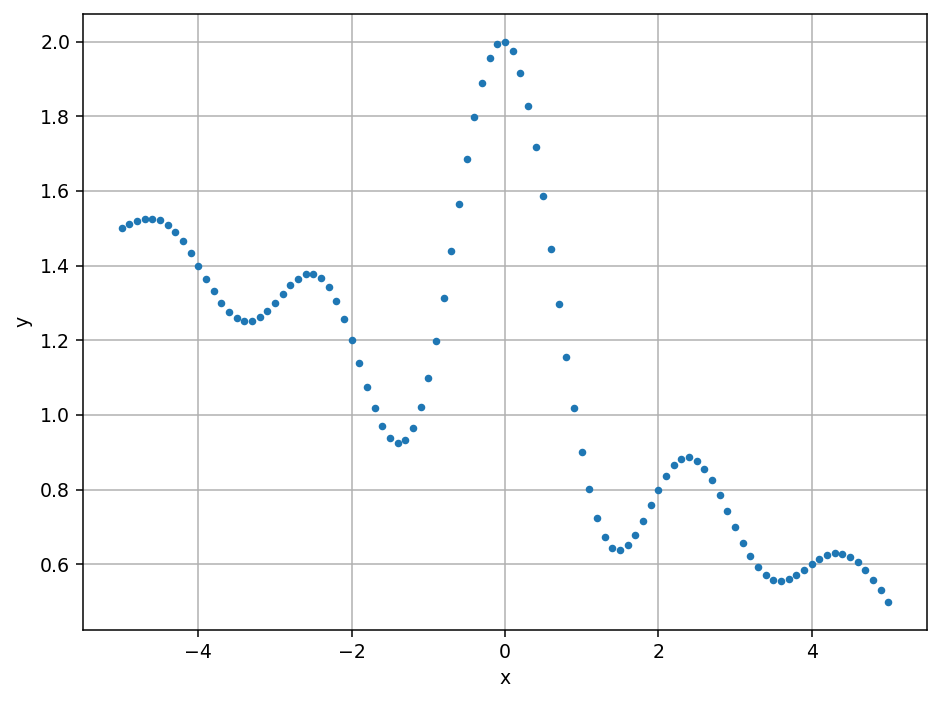

In [76]:
# Plot
fig1, ax1 = plt.subplots(figsize = (8,6), dpi = 136)
ax1.plot(x,y,'.')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid(True)
#fig1.savefig("spec.png")
plt.show()

In [125]:
# integrate ...
I, C = integrate_listed_values(x,y)

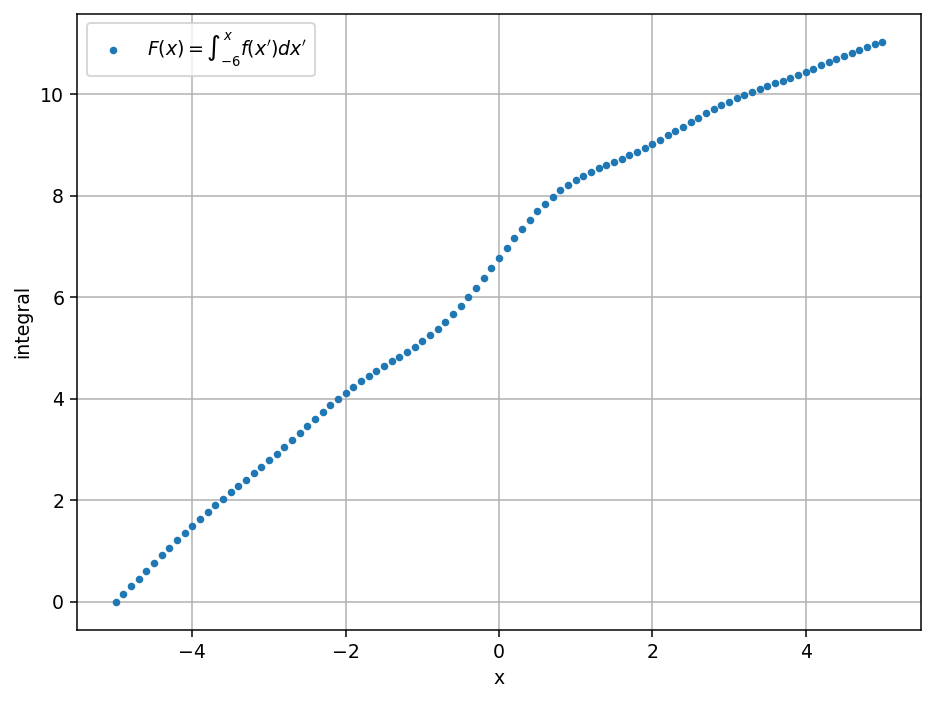

In [126]:
# Plot
fig2, ax2 = plt.subplots(figsize = (8,6), dpi = 136)
ax2.plot(x,C,'.', label = r"$F(x) = \int_{-6}^x f(x')dx'$")
ax2.set_xlabel("x")
ax2.set_ylabel("integral")
ax2.grid(True)
ax2.legend()
#fig2.savefig("spec_integral.png")
plt.show()

In [127]:
# differentiate ...
M = differentiate_listed_values(x,y)

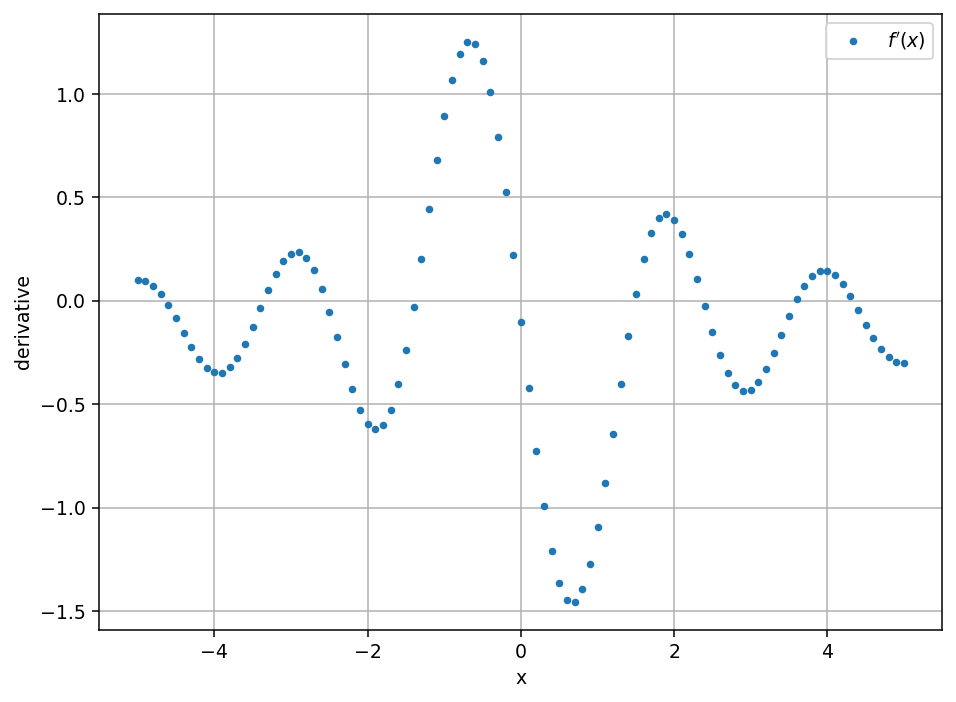

In [133]:
# Plot
fig3, ax3 = plt.subplots(figsize = (8,6), dpi = 136)
ax3.plot(x,M,'.', label = r"$f'(x)$")
ax3.set_xlabel("x")
ax3.set_ylabel("derivative")
ax3.grid(True)
ax3.legend()
#fig3.savefig("spec_derivative.png")
plt.show()

## Find Local Maxima and Local Minima

Idea (algorithm): Take three sequential points and check whether the middle point is larger than its left and right neighbor.

In [129]:
xL, yL = x[0:-2], y[0:-2]
xM, yM = x[1:-1],y[1:-1]
xR, yR = x[2:], y[2:]
idx_loc_max = (yM > yL) & (yM > yR) 
idx_loc_min = (yM < yL) & (yM < yR) 

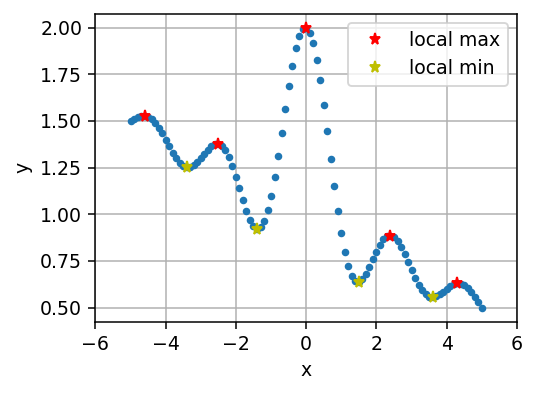

In [134]:
# Plot
fig4, ax4 = plt.subplots(figsize = (4,3), dpi = 136)
ax4.plot(x,y,'.')
#ax4.plot(xM,yM,'x')
ax4.plot(xM[idx_loc_max],yM[idx_loc_max],"*r", label = "local max")
ax4.plot(xM[idx_loc_min],yM[idx_loc_min],"*y", label = "local min")
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_xlim(-6,6)
ax4.legend()
ax4.grid(True)
#ax4.plot(xR,yR,'+r')
#ax4.plot(xL,yL,'ob')
plt.show()